In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from graph import *
import scipy

from auxiliary import load_pickle
%matplotlib inline

sns.set_theme()

In [31]:
PATH="./results/TestSuite-uniform_non_iid_06_17_2021"

In [32]:
data = load_pickle(PATH)

In [34]:
def get_mean_test_acc_per_epoch(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(node_dict['test_accuracies'])
    transpose = list(zip(*top_acc_list))
    return [np.mean(node) for node in transpose]

In [35]:
def graph_mean_epochs(results, setup="not_private", n_subplots=3):
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13, 5))

    for idx, run in enumerate(results):
        if setup == "not_private":
            if not run['add_privacy_list']:
                ax[idx % 3].plot(run['epoch_list'], get_mean_test_acc_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx % 3].tick_params(axis='x', labelsize=15)
                ax[idx % 3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
        if setup == "private":
            if run['add_privacy_list']:
                ax[idx % 3].plot(run['epoch_list'], get_mean_test_acc_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx % 3].tick_params(axis='x', labelsize=15)
                ax[idx % 3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)

    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Mean Test Accuracy", fontsize=18)
        ax[i].set_xlim(0, 50)
        ax[i].set_ylim(0, 1)

    ax[2].legend()

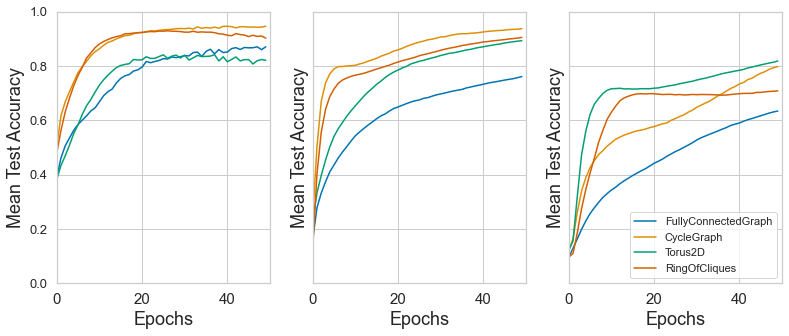

In [36]:
graph_mean_epochs(data)

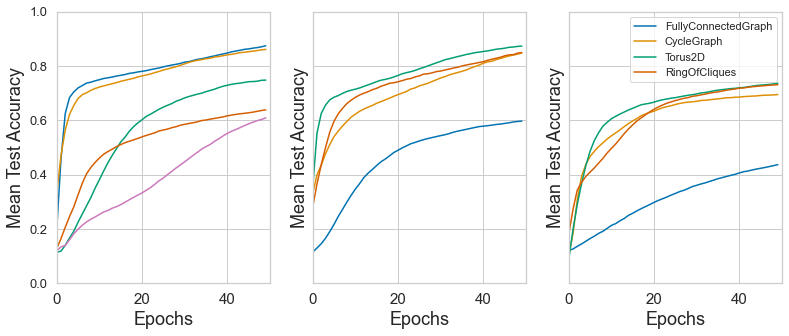

In [37]:
graph_mean_epochs(data, "private")

In [11]:
def get_top1_accuracy(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(max(node_dict['test_accuracies']))

    return top_acc_list, sum(top_acc_list) / len(top_acc_list)

In [14]:
def graph_top1_epochs(results, setup="uniform_iid_non_private", n_subplots=3):
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")

    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13, 5))

    for idx, run in enumerate(results):
        if setup == "uniform_iid_non_private":
            if not run['add_privacy_list']:
                ax[idx % 3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx % 3].tick_params(axis='x', labelsize=15)
                ax[idx % 3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)
        if setup == "uniform_iid_private":
            if run['add_privacy_list']:
                ax[idx % 3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
                #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
                ax[idx % 3].tick_params(axis='x', labelsize=15)
                ax[idx % 3].tick_params(axis='y', labelsize=13)
                #ax[idx%3].set_title("Nodes: " + str(run['nr_nodes']), fontsize=20)

    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Test Accuracy", fontsize=18)
        ax[i].set_xlim(0, 20)

    ax[2].legend()

ValueError: x and y must have same first dimension, but have shapes (50,) and (2,)

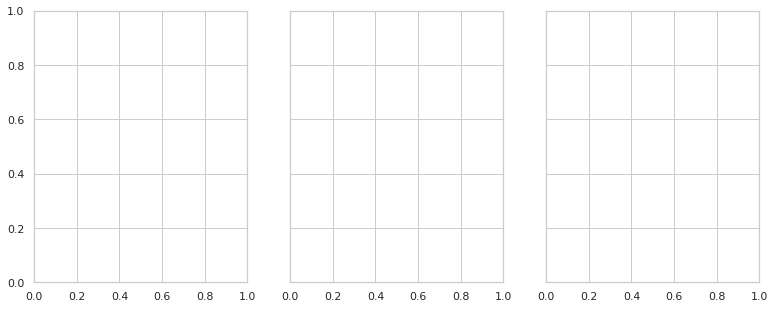

In [16]:
fig = graph_top1_epochs(data)
fig
#plt.savefig("./plots/topology_testrun_iid_uniform_data_non_private.pdf")

In [ ]:
graph_top1_epochs(data, "uniform_iid_private")
#plt.savefig("./plots/topology_testrun_iid_uniform_data_private.pdf")

In [ ]:
def graph_top1_bytes(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x=run['node_0']['sent_bytes'], y=get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.xlabel('Bytes')
    plt.ylabel('Accuracy')

In [ ]:
graph_top1_bytes(data)

In [4]:
for i in [FullyConnectedGraph, CycleGraph, RingOfCliques, Torus2D]:
    for j in [4, 16, 32]:
        print(f"{i} - {j} Spectral Gap: {i(j).spectral_gap()}")

<class 'graph.FullyConnectedGraph'> - 4 Spectral Gap: 0.666666666666667
<class 'graph.FullyConnectedGraph'> - 16 Spectral Gap: 0.9333333333333335
<class 'graph.FullyConnectedGraph'> - 32 Spectral Gap: 0.9677419354838712
<class 'graph.CycleGraph'> - 4 Spectral Gap: 1.0
<class 'graph.CycleGraph'> - 16 Spectral Gap: 0.07612046748871304
<class 'graph.CycleGraph'> - 32 Spectral Gap: 0.019214719596769236
<class 'graph.RingOfCliques'> - 4 Spectral Gap: 1.0
<class 'graph.RingOfCliques'> - 16 Spectral Gap: 0.10354534866096143
<class 'graph.RingOfCliques'> - 32 Spectral Gap: 0.028299548249032025
<class 'graph.Torus2D'> - 4 Spectral Gap: 1.0
<class 'graph.Torus2D'> - 16 Spectral Gap: 0.1952621458756344
<class 'graph.Torus2D'> - 32 Spectral Gap: 0.05074697832580821
